In [1]:
from langgraph.graph import StateGraph, END
from workout_ai.models import UserProfile, WorkoutState
from workout_ai.agents import WorkoutPlannerAgent, NutritionPlannerAgent

C:\Users\Dulanjana\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
builder = StateGraph(WorkoutState)

workout_planner_agent = WorkoutPlannerAgent()
nutrition_planner_agent = NutritionPlannerAgent()

builder.add_node(
    "workout_planner",
    workout_planner_agent.plan_workout
)
builder.add_node(
    "nutrition_planner",
    nutrition_planner_agent.plan_nutrition
)
builder.add_edge(
    "workout_planner", "nutrition_planner"
)
builder.add_edge(
    "nutrition_planner", END
)
builder.set_entry_point("workout_planner")

graph = builder.compile()

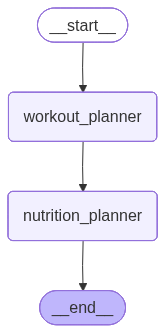

In [3]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))  # type: ignore

In [4]:
user_profile = UserProfile(
    age=30,
    gender="male",
    fitness_level="intermediate",
    height=175,
    weight=70,
    workout_days_per_week=4,
    workout_duration_minutes=60,
    fitness_goals=[
        "weight_loss"
    ]
)

In [7]:
workout_state = WorkoutState(
    user_profile=user_profile,
    remained_selected_plans=["workout_plan", "nutrition_plan"]
)

In [8]:
response = graph.invoke(workout_state)

In [ ]:
print(response["workout_plan"])

## PERSONALIZED WORKOUT PLAN

### WEEKLY WORKOUT STRUCTURE

- **Day 1:** High-Intensity Interval Training (HIIT)
- **Day 2:** Strength Training (Upper Body)
- **Day 3:** Rest Day
- **Day 4:** High-Intensity Interval Training (HIIT)
- **Day 5:** Strength Training (Lower Body)
- **Day 6:** Rest Day
- **Day 7:** Active Rest (Light Cardio or Stretching)

### DAILY WORKOUT PLAN

**Day 1 & Day 4: HIIT Workout (60 minutes)**

- 10 minutes: Warm-Up (light cardio like jogging or cycling)
- 40 minutes: HIIT (Alternate between 1 minute of high-intensity exercise like sprinting or burpees and 1 minute of low-intensity exercise like walking or bodyweight squats)
- 10 minutes: Cool Down (stretching and slow-paced walking)

**Day 2: Strength Training - Upper Body (60 minutes)**

- 10 minutes: Warm-Up (light cardio, arm circles)
- 5 minutes: Handgrip exercises for forearm strength
- 15 minutes: Bench Press (3 sets x 12 reps)
- 15 minutes: Bent Over Rows (3 sets x 12 reps)
- 10 minutes: Overhead Should

In [10]:
print(response["nutrition_plan"])

## PERSONALIZED NUTRITION PLAN

### OVERVIEW
This plan focuses on a healthy balance of protein, carbohydrates, and fats to support muscle recovery and fuel your workouts, while also creating a mild caloric deficit to promote weight loss. Meals are spread throughout the day to maintain steady energy levels and curb appetite.

### CALORIC INTAKE
Given your age, weight, height, and activity level, your estimated daily caloric need for maintenance is around 2500 calories. To create a healthy deficit for weight loss, aim for around 2000 calories per day.

### MACRONUTRIENT DISTRIBUTION
- Protein: 30% (150 grams)
- Carbohydrates: 40% (200 grams)
- Fats: 30% (67 grams)

### MEAL TIMING
- Breakfast: 7:00 AM
- Morning Snack: 10:00 AM
- Lunch: 1:00 PM
- Afternoon Snack: 4:00 PM
- Dinner: 7:00 PM
- Evening Snack: 10:00 PM

### DETAILED PLAN

**Breakfast (7:00 AM)**
- Scrambled Eggs (2 large eggs, with spinach and tomatoes)
- Whole grain toast (1 slice)
- Mixed berries (1 cup)
- Green tea

**Morni